# Acc 1 Stock Performance Tracker


## Setup


In [30]:
import contextlib

import pandas as pd

import const
import draw_utils
import process_utils

In [31]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [32]:
acc_name = const.ACC1_NAME
user_name_l = const.ACC_USER_DICT[acc_name]
compare_index = const.VNI_NAME


## Prepare Dataframe


In [33]:
log_df, cf_df = process_utils.prepare_log_df_cf_df(
    acc_user_dict={
        acc_name_key: user_name_l
        for acc_name_key, user_name_l in const.ACC_USER_DICT.items()
        if acc_name_key == acc_name
    },
    acc_combined_name=None,
    index_name_l=[compare_index],
    index_combined_name=None,
)


In [34]:
user_df = process_utils.get_user_df(
    log_df,
    cf_df,
    acc_name=acc_name,
    user_name_l=user_name_l,
    index_name=compare_index,
)


## Charts


### NAV


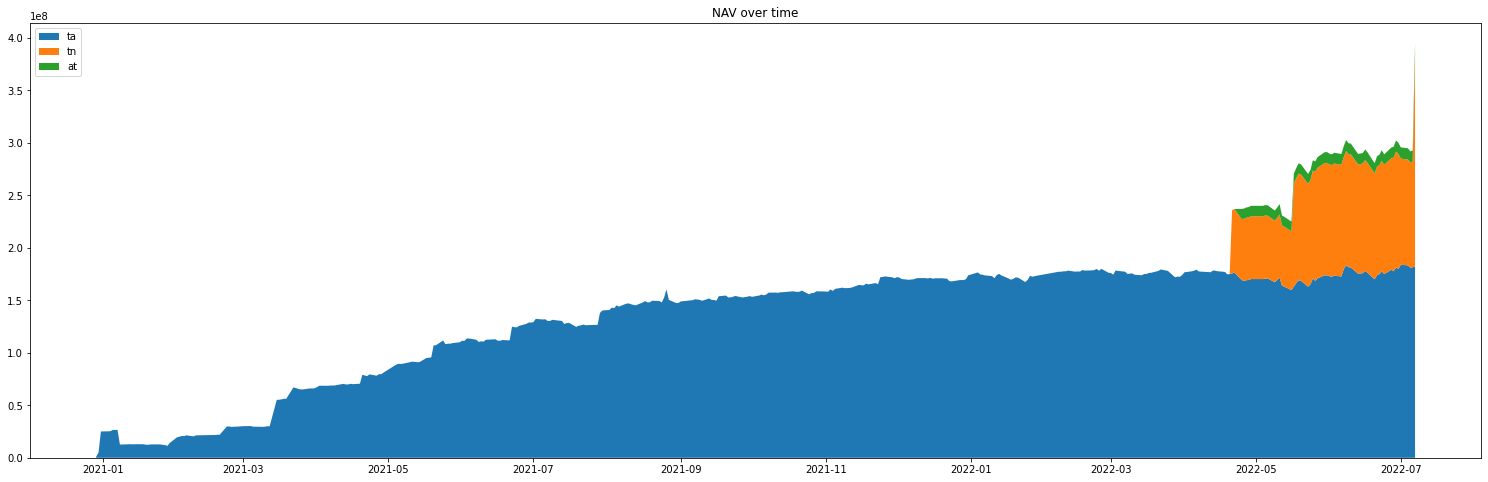

In [35]:
y_list = [user_df[user_name] for user_name in user_name_l]

draw_utils.plot_nav_stackplot(
    x=user_df.index,  # type: ignore
    y=y_list,
    labels=user_name_l,
)


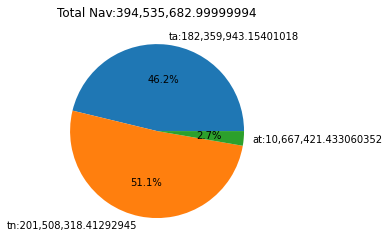

In [36]:
nav_l = [user_df[user_name].iloc[-1] for user_name in user_name_l]  # type: ignore
label_l = [f"{user_name}:{nav:,}" for user_name, nav in zip(user_name_l, nav_l)]
draw_utils.plot_nav_pie(nav_l, label_l=label_l)


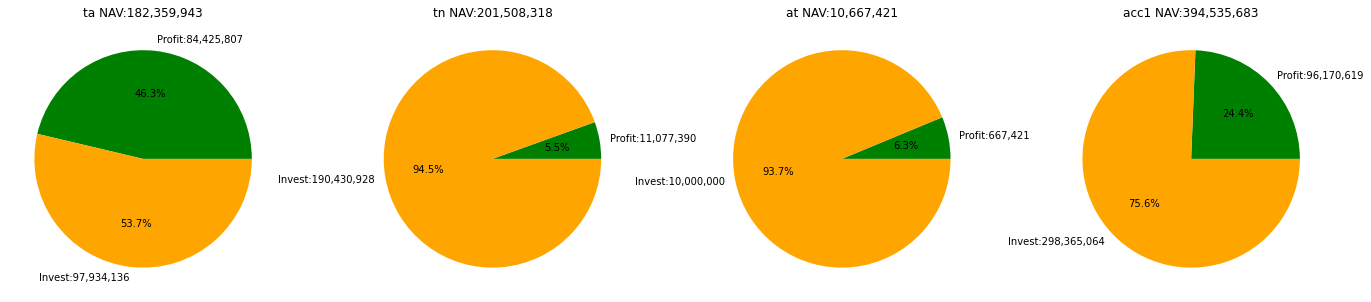

In [37]:
profit_invest_list: list[tuple[str, float, float]] = []
for name in user_name_l + [acc_name]:
    nav = user_df[name].iloc[-1]
    invest = -user_df[f"{name}_cf"].sum()
    profit = nav - invest
    profit_invest_list.append((name, profit, invest))
draw_utils.plot_profit_invest_pies(profit_invest_list)


### Recent


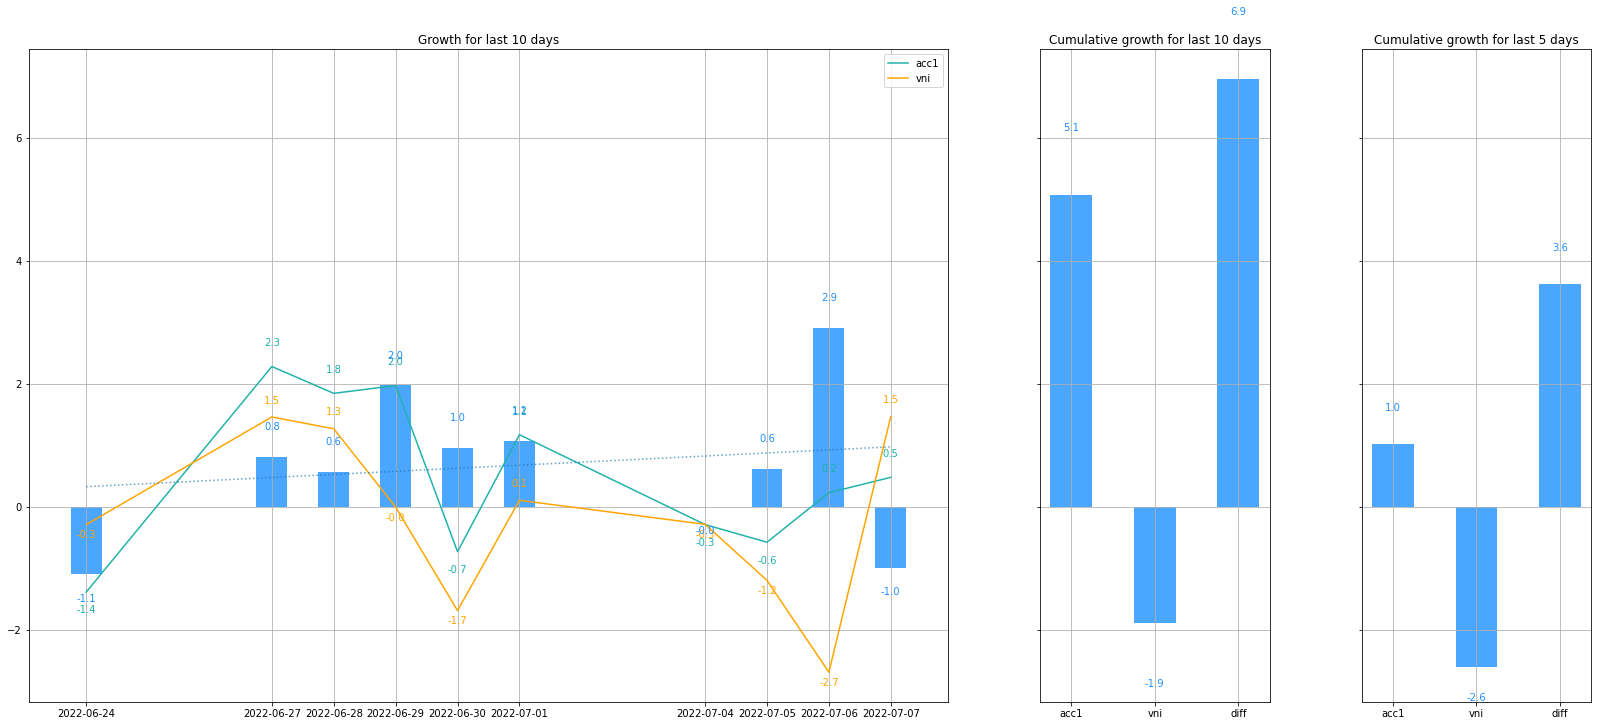

In [38]:
draw_utils.plot_recent_growth(
    user_df,
    num_days=10,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


In [39]:
# user_df.tail(10)


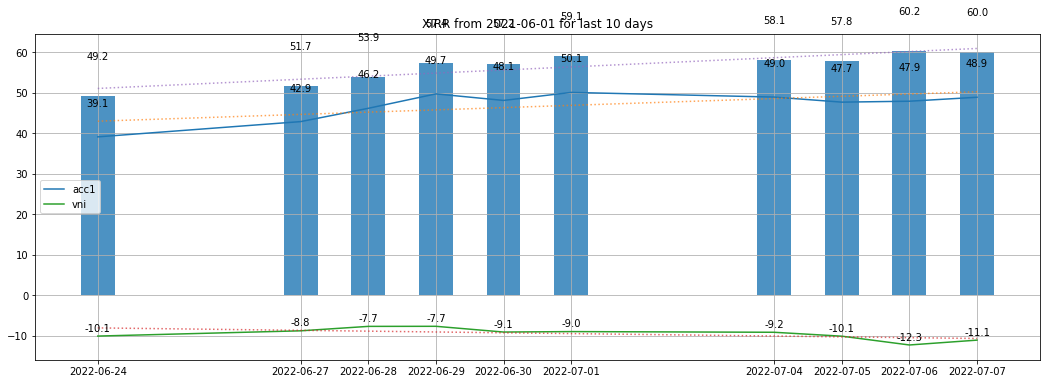

In [40]:
draw_utils.plot_recent_xirr(
    log_df=user_df,
    cf_df=cf_df,
    num_days=10,
    anchor_date="2021-06-01",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


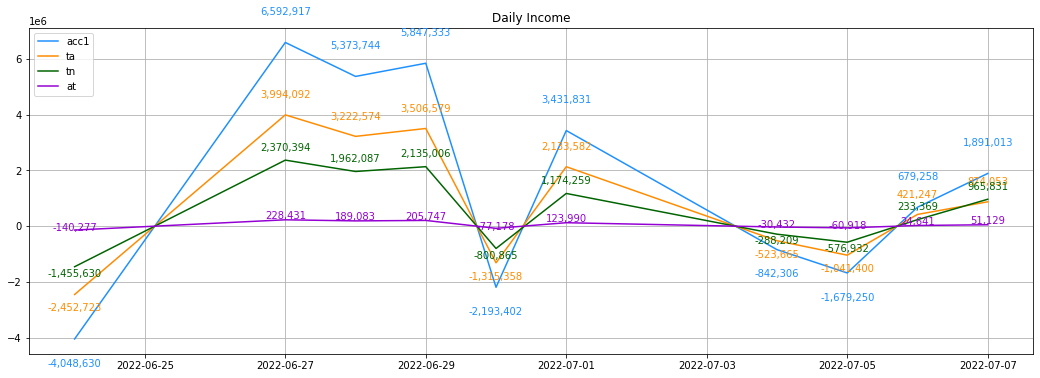

In [41]:
draw_utils.plot_recent_income(
    daily_df=user_df,
    num_days=10,
    name_l=[acc_name] + user_name_l,
)


### Diff distribution


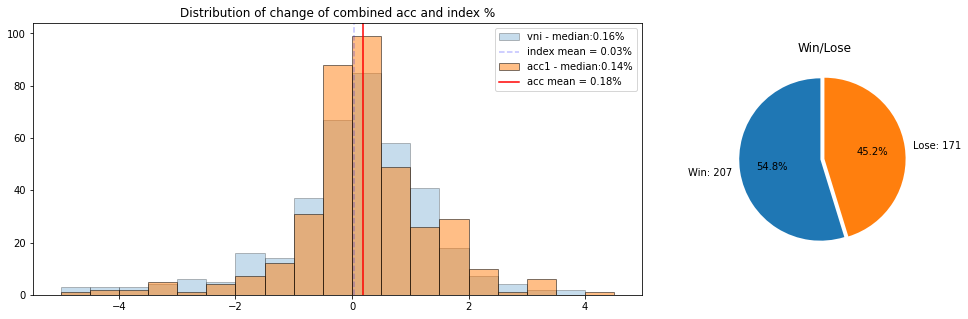

In [42]:
draw_utils.plot_daily_diff_p_distribution(
    user_df,
    acc_name=acc_name,
    index_name=compare_index,
)


### Growth XIRR


In [43]:
anchor_date = "2022-4-21"

growth_xirr_df = process_utils.get_overall_growth_xirr_df(
    user_df,
    cf_df,
    anchor_date=anchor_date,
    acc_name_l=[acc_name],
    index_name_l=[compare_index],
)


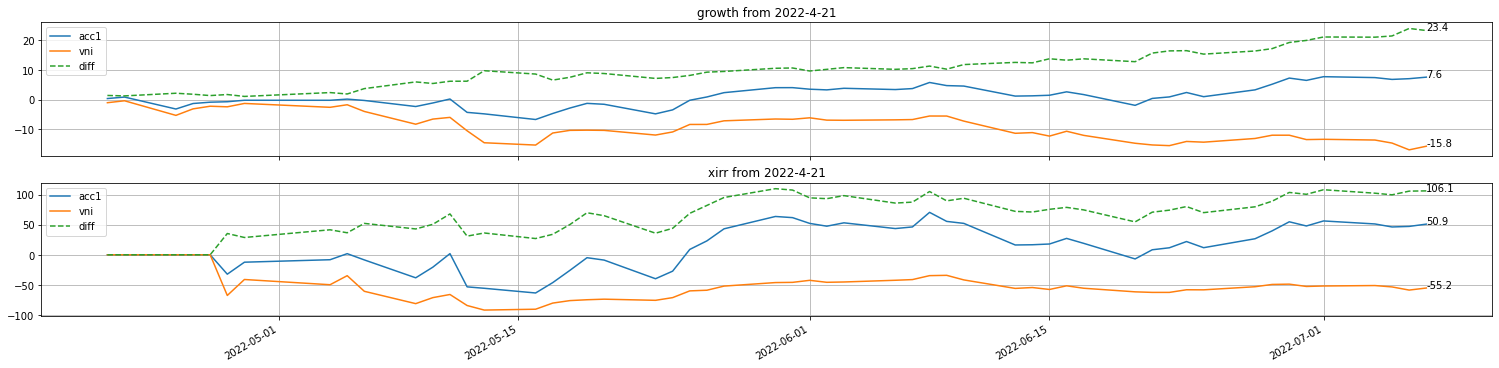

In [44]:
draw_utils.plot_growth_xirr_over_time(
    growth_xirr_df,
    anchor_date=anchor_date,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


### Periodic


In [45]:
periodic_user_df = process_utils.add_period_cols(user_df)


#### Weekly


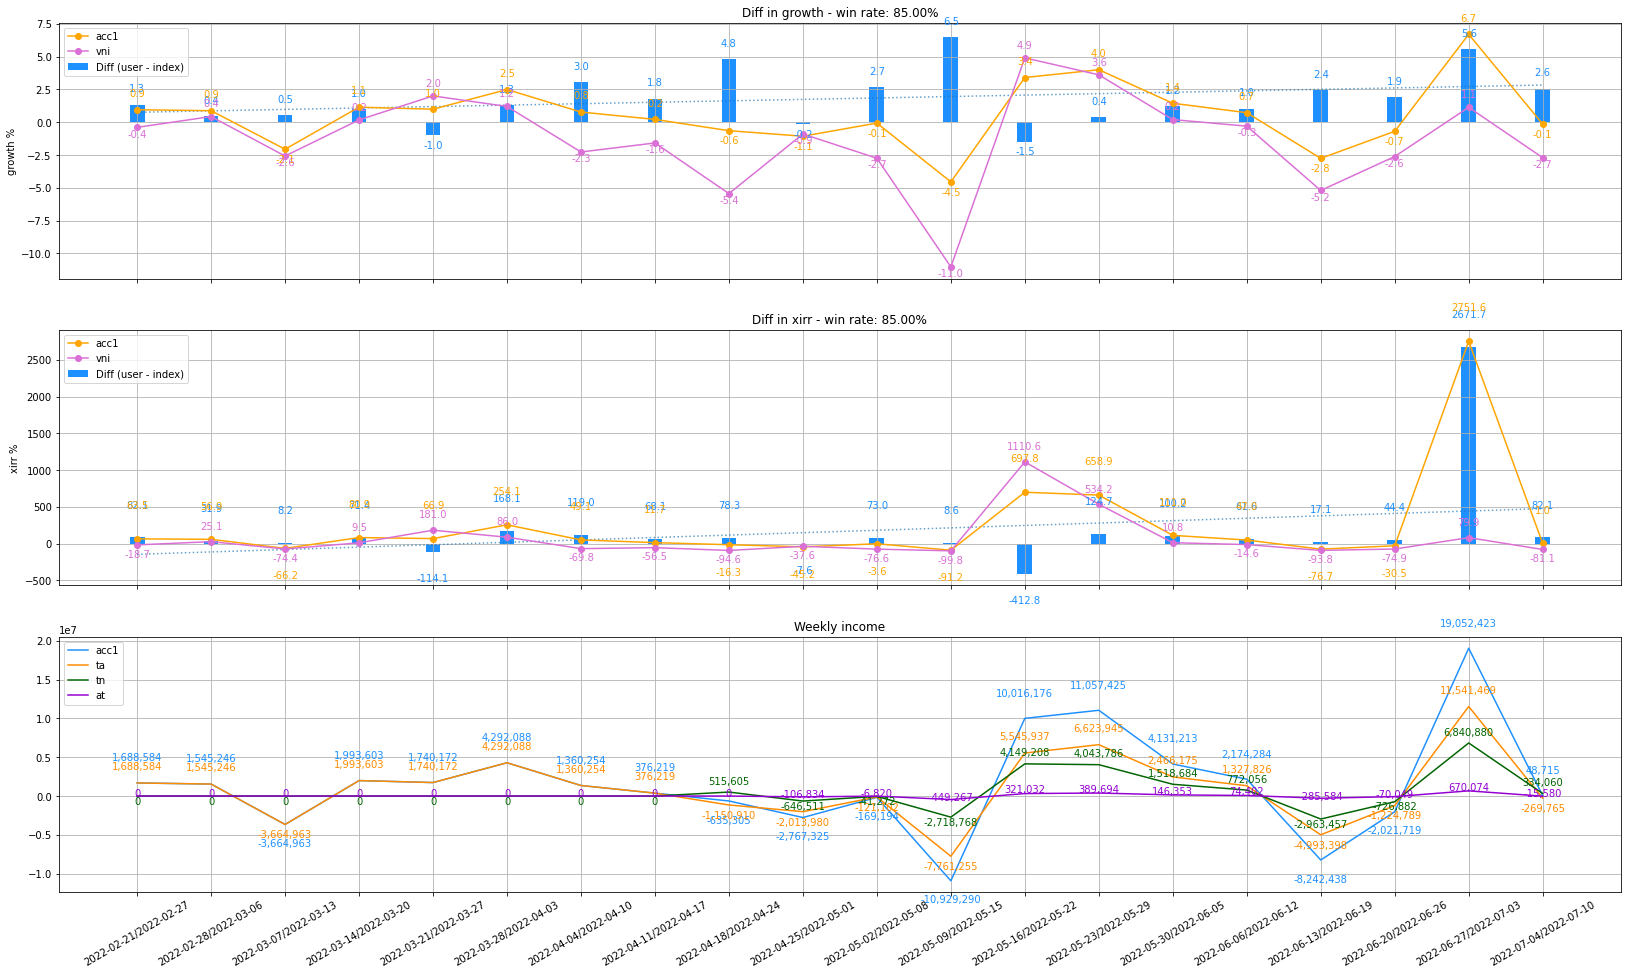

In [46]:
weekly_df = process_utils.get_period_df(
    period_symbol="W",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)
# Not enough space to plot every week
weekly_df = process_utils.filter_latest_x_rows(df=weekly_df, row_num=20)  # type: ignore

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=weekly_df,
    period_name="Weekly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Monthly


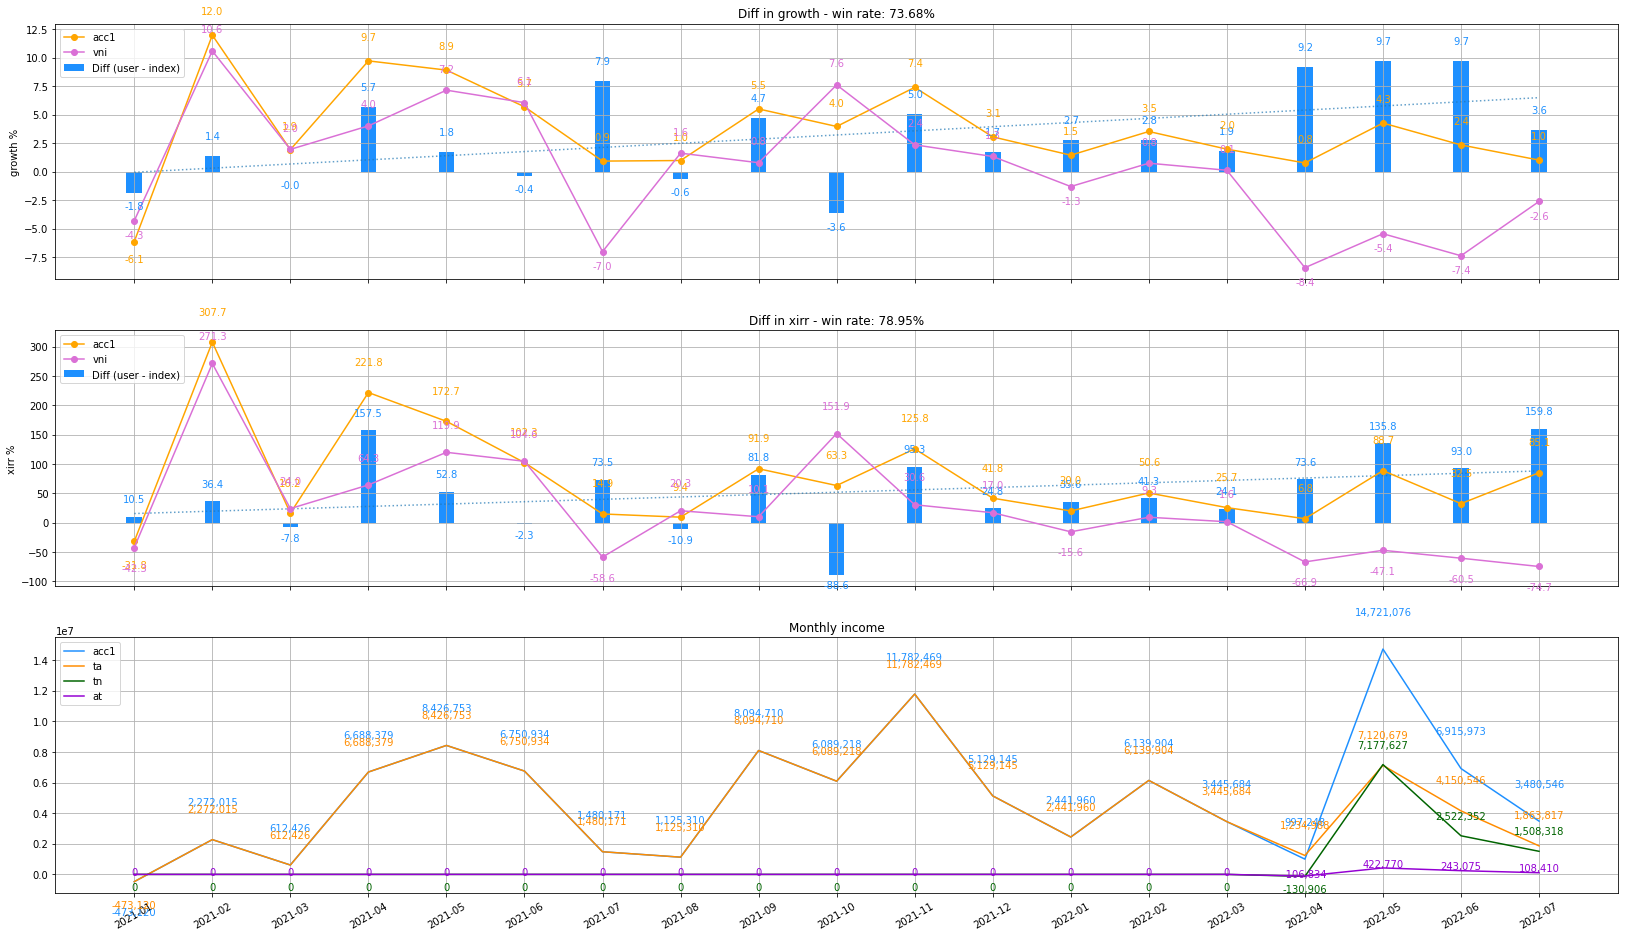

In [47]:
monthly_df = process_utils.get_period_df(
    period_symbol="M",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020-12
    monthly_df.drop(["2020-12"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=monthly_df,
    period_name="Monthly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Quarterly


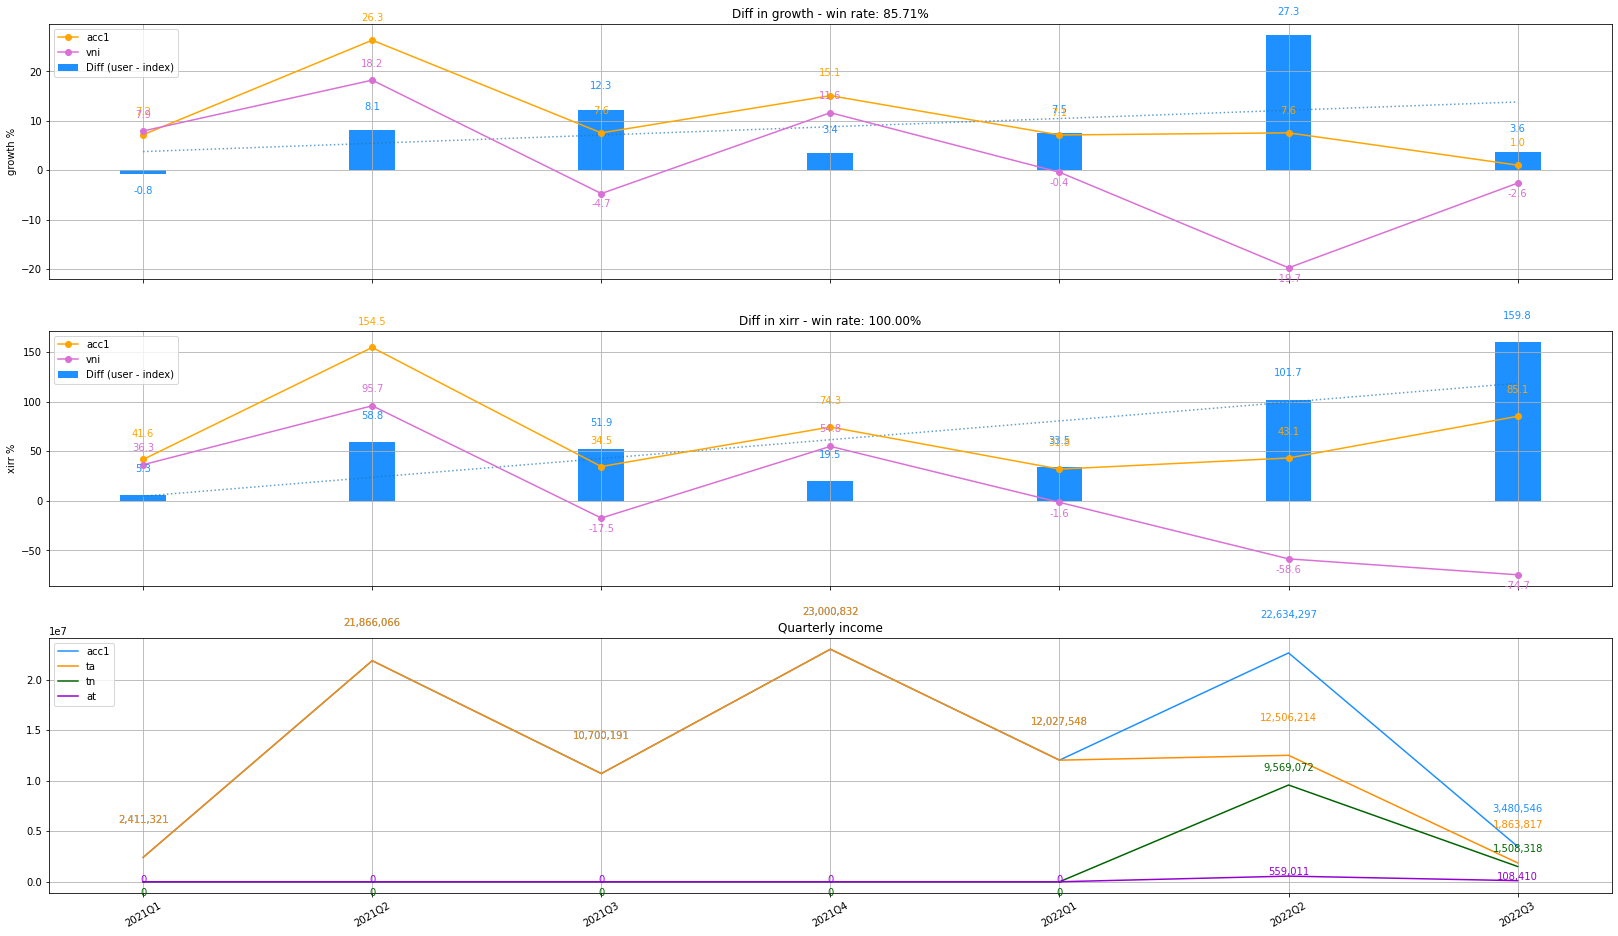

In [48]:
quaterly_df = process_utils.get_period_df(
    period_symbol="Q",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020Q4
    quaterly_df.drop(["2020Q4"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=quaterly_df,
    period_name="Quarterly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Yearly


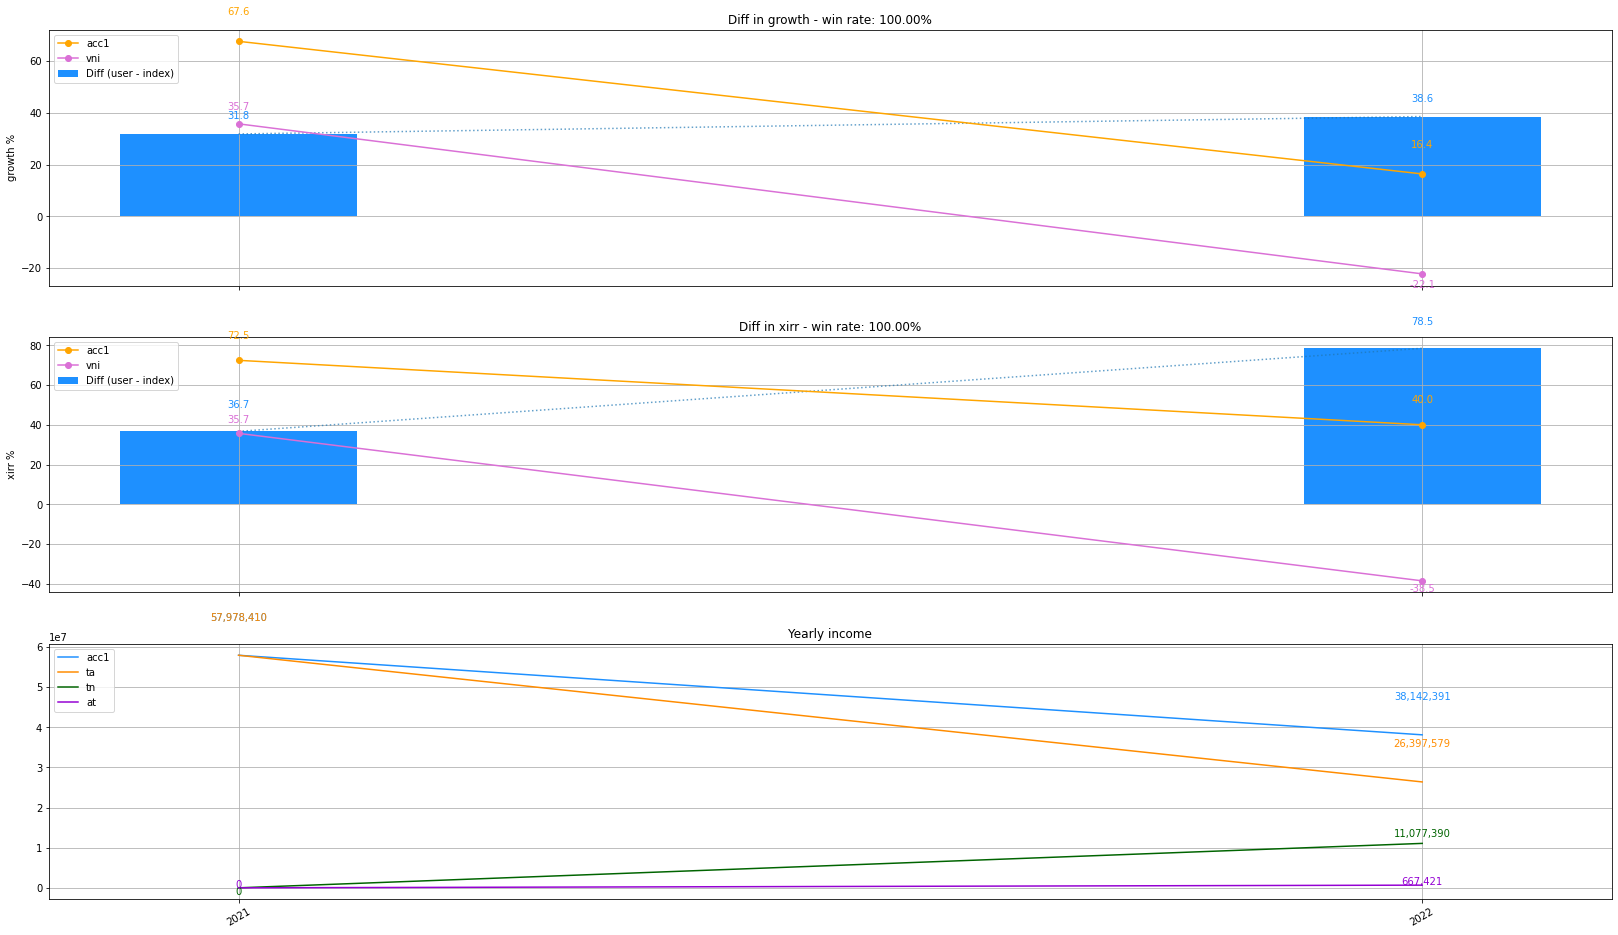

In [49]:
yearly_df = process_utils.get_period_df(
    period_symbol="Y",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020
    yearly_df.drop(["2020"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=yearly_df,
    period_name="Yearly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


## Fee


In [50]:
processing_user_name = const.TN_USER_NAME
user_fee_p = const.USER_NAME_FEE_DICT[processing_user_name]
user_fee_anchor_date = const.USER_NAME_FEE_ANCHOR_DATE[processing_user_name]


In [51]:
user_df.tail()


,vni,vni_diff,acc1,acc1_diff,ta_cf,tn_cf,at_cf,acc1_cf,day_start,ta_day_start,ta_share,ta_diff,ta,tn_day_start,tn_share,tn_diff,tn,at_day_start,at_share,at_diff,at,acc1_diff_p,acc1_aux_diff_p,ta_diff_p,ta_aux_diff_p,tn_diff_p,tn_aux_diff_p,at_diff_p,at_aux_diff_p,vni_diff_p,vni_aux_diff_p
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-01,1198.90,1.30,295686968,3431831.0,-1737547.0,9569072.0,0.0,7831525.0,292255137.0,1.816961e+08,0.621704,2.133582e+06,1.838297e+08,1.000000e+08,0.342167,1.174259e+06,1.011743e+08,1.055901e+07,0.036129,123990.093179,1.068300e+07,0.011743,1.011743,0.011743,1.011743,0.011743,1.011743,0.011743,1.011743,0.001086,1.001086
2022-07-04,1195.53,-3.37,294844662,-842306.0,0.0,0.0,0.0,0.0,295686968.0,1.838297e+08,0.621704,-5.236648e+05,1.833060e+08,1.011743e+08,0.342167,-2.882091e+05,1.008860e+08,1.068300e+07,0.036129,-30432.034510,1.065257e+07,-0.002849,0.997151,-0.002849,0.997151,-0.002849,0.997151,-0.002849,0.997151,-0.002811,0.997189
2022-07-05,1181.29,-14.24,291965412,-1679250.0,1200000.0,0.0,0.0,1200000.0,293644662.0,1.821060e+08,0.620158,-1.041400e+06,1.810646e+08,1.008860e+08,0.343565,-5.769316e+05,1.003091e+08,1.065257e+07,0.036277,-60918.276738,1.059165e+07,-0.005719,0.994281,-0.005719,0.994281,-0.005719,0.994281,-0.005719,0.994281,-0.011911,0.988089
2022-07-06,1149.61,-31.68,292644670,679258.0,0.0,0.0,0.0,0.0,291965412.0,1.810646e+08,0.620158,4.212472e+05,1.814859e+08,1.003091e+08,0.343565,2.333693e+05,1.005425e+08,1.059165e+07,0.036277,24641.492822,1.061629e+07,0.002327,1.002327,0.002327,1.002327,0.002327,1.002327,0.002327,1.002327,-0.026818,0.973182
2022-07-07,1166.48,16.87,394535683,1891013.0,0.0,-100000000.0,0.0,-100000000.0,392644670.0,1.814859e+08,0.462214,8.740528e+05,1.823599e+08,2.005425e+08,0.510748,9.658311e+05,2.015083e+08,1.061629e+07,0.027038,51129.044788,1.066742e+07,0.004816,1.004816,0.004816,1.004816,0.004816,1.004816,0.004816,1.004816,0.014675,1.014675


In [52]:
relevant_columns = [
    f"{compare_index}",
    f"{compare_index}_diff_p",
    processing_user_name,
    f"{processing_user_name}_day_start",
    f"{processing_user_name}_diff",
    f"{processing_user_name}_diff_p",
]

fee_df = user_df[relevant_columns]
fee_df = fee_df[fee_df.index >= user_fee_anchor_date]  # type: ignore


fee_df[f"{processing_user_name}_outperf_p"] = (
    fee_df[f"{processing_user_name}_diff_p"] - fee_df[f"{compare_index}_diff_p"]
)
fee_df[f"{processing_user_name}_outperf"] = (
    fee_df[f"{processing_user_name}_day_start"]
    * fee_df[f"{processing_user_name}_outperf_p"]
)
fee_df[f"{processing_user_name}_outperf_fee"] = (
    fee_df[f"{processing_user_name}_outperf"] * user_fee_p
)

fee_df.tail()


,vni,vni_diff_p,tn,tn_day_start,tn_diff,tn_diff_p,tn_outperf_p,tn_outperf,tn_outperf_fee
date,,,,,,,,,
2022-07-01,1198.90,0.001086,1.011743e+08,1.000000e+08,1.174259e+06,0.011743,0.010657,1.065708e+06,159856.221002
2022-07-04,1195.53,-0.002811,1.008860e+08,1.011743e+08,-2.882091e+05,-0.002849,-0.000038,-3.817399e+03,-572.609843
2022-07-05,1181.29,-0.011911,1.003091e+08,1.008860e+08,-5.769316e+05,-0.005719,0.006192,6.247256e+05,93708.847087
2022-07-06,1149.61,-0.026818,1.005425e+08,1.003091e+08,2.333693e+05,0.002327,0.029145,2.923473e+06,438520.986206
2022-07-07,1166.48,0.014675,2.015083e+08,2.005425e+08,9.658311e+05,0.004816,-0.009858,-1.977038e+06,-296555.695378


In [53]:
print(f"{processing_user_name}")

cum_profit = fee_df[f"{processing_user_name}_diff"].sum()
print(f"\t Cummulative daily profit: \t{cum_profit:,.0f}")

cum_outperf = fee_df[f"{processing_user_name}_outperf"].sum()
print(f"\t Cummulative outperf. profit: \t{cum_outperf:,.0f}")

if cum_profit>0:
    cum_fee = fee_df[f"{processing_user_name}_outperf_fee"].sum()
    print(f"\t Cummulative outferf. fee: \t{cum_fee:,.0f}")


tn
	 Cummulative daily profit: 	1,508,318
	 Cummulative outperf. profit: 	2,633,052
	 Cummulative outferf. fee: 	394,958


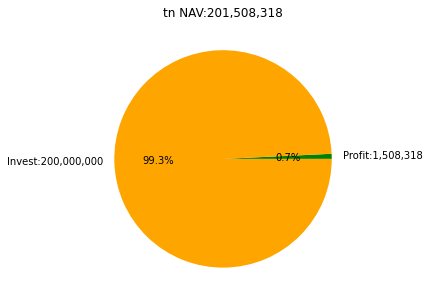

In [54]:
start_nav = user_df.loc[user_fee_anchor_date, f"{processing_user_name}_day_start"]
cashflow = user_df.loc[
    user_df.index > user_fee_anchor_date, f"{processing_user_name}_cf"
].sum()
total_invest = (
    start_nav - cashflow
)  # cashflow is negative for investing, positive for withdrawing
draw_utils.plot_profit_invest_pies([(processing_user_name, cum_profit, total_invest)])
